In [1]:
%load_ext autoreload
%autoreload 2

In [25]:
import os, snap
import pandas as pd
import itertools
import numpy as np
import sys

from matplotlib import pyplot as plt
from src.DataReader import DataReader
from src.constants import SPLIT_TIME, STORE_LOCATION, DATA_ROOT, POSTS_FILE, VOTES_FILE

In [26]:
%matplotlib inline

In [3]:
data_directory = DATA_ROOT

In [4]:
post_reader = DataReader(os.path.join(data_directory, POSTS_FILE), True)
post_reader.read_data()

Reading file...
Converting...
Progress | ██████████ | 100% || Estimated time remaining: 0.0 seconds
Conversion complete...
Forming data frame...


In [6]:
pdf = post_reader._df

In [10]:
pdf_train = pdf[pdf.CreationDate <= dt_parse(SPLIT_TIME)]

In [11]:
users_pdf = pdf_train[(pdf_train.OwnerUserId.notnull()) & (pdf_train.PostTypeId==2) ]

In [15]:
graph = snap.TUNGraph.New()

In [16]:
answer_groups = users_pdf.groupby(['ParentId'])

In [19]:
for nm, grp in answer_groups:
    users = grp.OwnerUserId
    users = users[users.notnull()].astype(int)
    
    edge_pairs = itertools.combinations(users, 2)
    
    for u in users:
        if not graph.IsNode(u):
            graph.AddNode(u)
        
    for ed in edge_pairs:
        graph.AddEdge(ed[0], ed[1])
    
#     break

In [20]:
print graph.GetEdges()
print graph.GetNodes()

321993
31834


In [22]:
DegToCntV = snap.TIntPrV()
snap.GetDegCnt(graph, DegToCntV)

In [23]:
deg_hist = {}
for item in DegToCntV:
    deg_hist[item.GetVal1()] = item.GetVal2()

x, y = zip(*deg_hist.items())

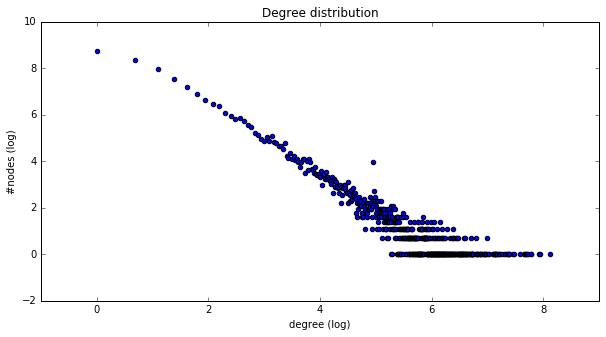

In [60]:
plt.figure(figsize=(10,5))
# ax = plt.subplot()

plt.scatter(np.log(x), np.log(y))

# plt.gca().set_yscale('log')
# plt.gca().set_xscale('log')

# ax.set_xscale('log')
# ax.set_yscale('log')

plt.xlabel('degree (log)')
plt.ylabel('#nodes (log)')
plt.title('Degree distribution')

plt.show()

In [ ]:
snap.SaveEdgeList(graph, 'data_created/user-(answer)-user.txt', 'User-user graph created using posts')